# Analysis
## Author: Sam Hersick
## Date: 4/14/25
## Purpose: <small>analyze the results from our two grid searches and find the effects that the hyper parameters had on different scoring metrics. Specifically we are looking at how these relationships are regarding imbalanced data.</small>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#style seaborn
sns.set_style('darkgrid')

# Load your results and fill in "blank" values with string "None"
# Pandas interprets None as missing value (NaN)
df_acc = pd.read_csv("rf_grid_accuracy.csv")
df_acc.fillna({"param_rf__class_weight": "None", "param_rf__max_depth": "None", "param_rf__max_features": "None"}, inplace=True)

df_f1 = pd.read_csv("rf_grid_f1.csv")
df_f1.fillna({"param_rf__class_weight": "None", "param_rf__max_depth": "None", "param_rf__max_features": "None"}, inplace=True)

In [2]:
#function for printing useful barplots for analyzing hyper parameters
#displays barplots for both accuracy and f1 datasets
def create_hyperparam_barplot(X, Y='mean_test_score', figsize=(6,3)):
    plt.figure(figsize=figsize)
    sns.barplot(data=df_acc,
                x=X,
                y=Y, 
                hue="param_rf__class_weight")
    plt.title(f"Accuracy - {Y} by {X} and class_weight")
    plt.legend(title="Class Weight")
    plt.show()

    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_f1,
                x=X,
                y=Y, 
                hue="param_rf__class_weight")
    plt.title(f"f1 - {Y} by {X} and class_weight")
    plt.legend(title="Class Weight")
    plt.show()

# Analyzing the results for our "accuracy" gridsearch
1. How good do the results appear to be based on the scoring?
2. How does the number of estimators affect overall accuracy?
3. How does max_features relate to accuracy?
4. How does max_features affect the time it took to fit the model?
5. Does oob_score affect the goodness of the model?
6. How does the hyperparameter you chose affect the results?

In [3]:
# How good do the results appear to be based on accuracy?
print(f"Accuracy test score results:\n{df_acc['mean_test_score'].describe()}")

Accuracy test score results:
count    48.000000
mean      0.821896
std       0.065665
min       0.705230
25%       0.819090
50%       0.857190
75%       0.861131
max       0.864869
Name: mean_test_score, dtype: float64


### Overview
Overall the test results based on the accuracy scored gridsearch appear to be very positive!

- mean score: 0.821
- standard deviation: 0.065
- max score: 0.861 (best hyper parameter combination)

#### Best Hyper Parameter Combination
These numbers demonstrate a very accurate model, with our best hyperparameter combination scoring with almost 90% accuracy.

#### High Performing Models  
The top 25% of models (Q3 to max) achieved accuracy between **0.861 and 0.865**, indicating a narrow margin among the best configurations.

#### Low Variability Among Top Performers  
With a **standard deviation of 0.066**, most results are tightly clustered around the mean, particularly in the top half. This implies that tuning hyperparameters yields moderate gains once a baseline performance level is reached.

#### Class imbalance
Something super important to consider however is how well it is performing for each class. We saw that they models (while being scored on accuracy) gave really good results for class 0 (precision: 0.95, recall: 0.71, f1: 0.81) but performed very poorly on class 1 (precision: 0.56, recall: 0.13, f1: 0.22) espescially when it comes to recall and false negatives. These results can be found in accuracy_output.txt.


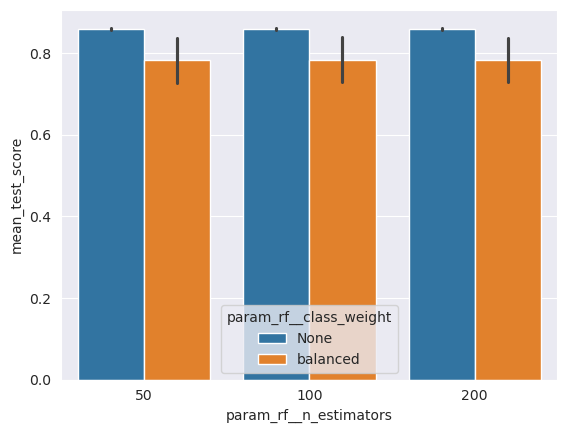

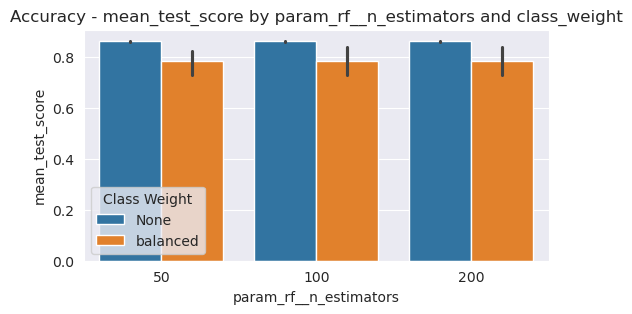

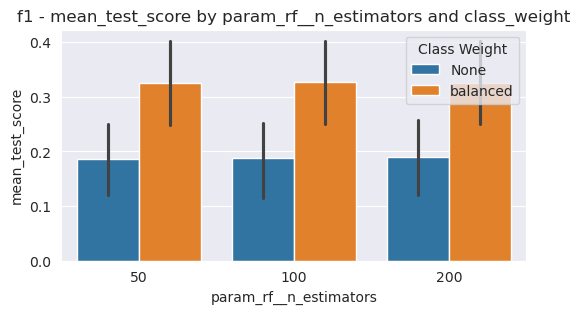

In [ ]:
#bar plot for analyzing n_estimators
create_hyperparam_barplot(X='param_rf__n_estimators')

#### n_estimators
Here we can see that variation in n_estimators actually had very little impact on the test scores. All of the bars with class_weight none are extremely similar, and the same can be said for class_weight_balanced.

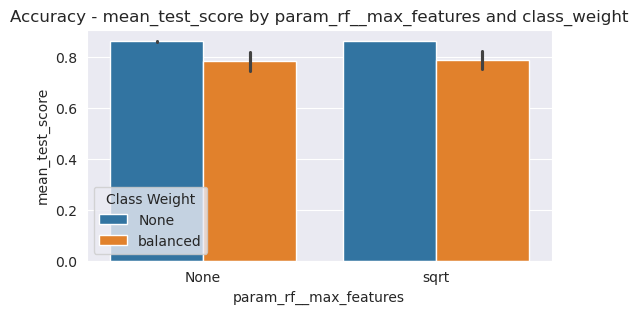

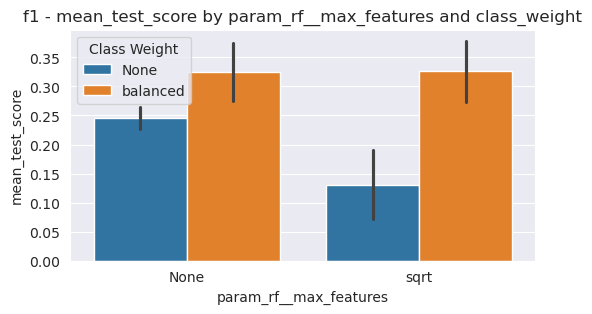

In [8]:
#bar plot for analyzing max_features on accuracy
create_hyperparam_barplot(X='param_rf__max_features')

#### max_features impact on accuracy
Similar to n_estimators, max_features has very minimal impact upon the final test score

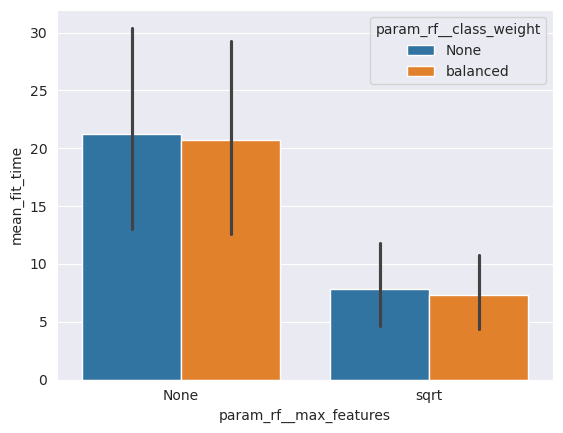

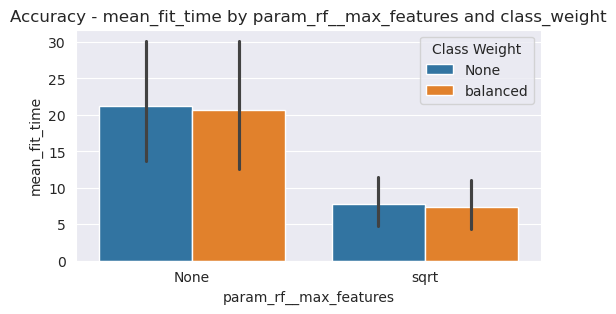

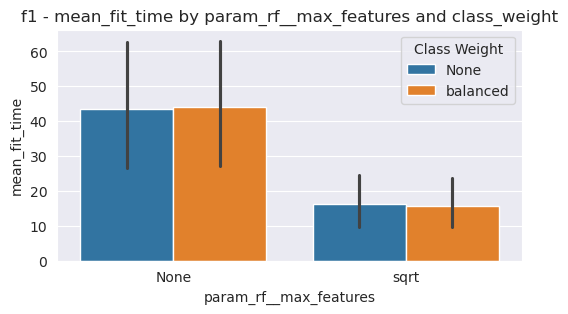

max_features = None:
count    24.000000
mean     20.970831
std      16.087577
min       4.585500
25%       9.714747
50%      15.919517
75%      26.778506
max      55.435598
Name: mean_fit_time, dtype: float64

max_features = sqrt:
count    24.000000
mean      7.565989
std       6.027574
min       1.450995
25%       3.360006
50%       5.573242
75%       9.537482
max      21.564751
Name: mean_fit_time, dtype: float64


In [ ]:
#bar plot for analyzing max_features, and how it effects the time taken to fit the model
create_hyperparam_barplot(X='param_rf__max_features', Y='mean_fit_time')

fit_time_none = df_acc[df_acc["param_rf__max_features"] == "None"]["mean_fit_time"]
fit_time_sqrt = df_acc[df_acc["param_rf__max_features"] == "sqrt"]["mean_fit_time"]
print(f"max_features = None:\n{fit_time_none.describe()}\n")
print(f"max_features = sqrt:\n{fit_time_sqrt.describe()}")

#### max_features impact on fit time
Here we can see the significant impact that max_features has on the fit time of the model. 

- Using sqrt(n) max features the average fit time =  7.5 seconds with a small standard deviation of 6 seconds.
- Using None for the max amount of features we get a mean fit of 21 seconds with a larger standard deviation of 16 seconds.

Overall by limiting the maximum amount of features used, we can reduce the fitting times by a significant amount.

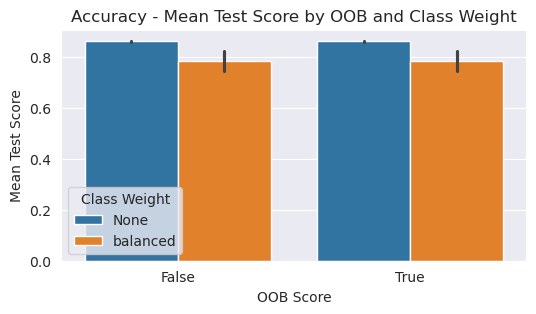

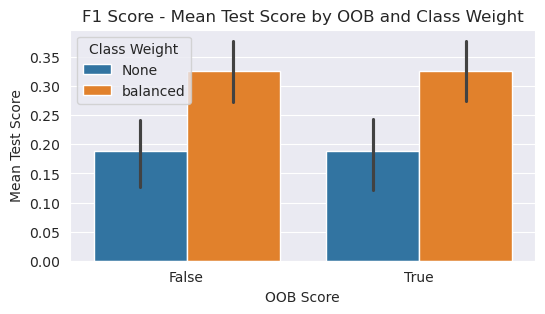

In [7]:
#bar plot for analyzing oob_score on accuracy
plt.figure(figsize=(6, 3))
sns.barplot(data=df_acc,
            x='param_rf__oob_score',
            y='mean_test_score', 
            hue="param_rf__class_weight")
plt.title("Accuracy - Mean Test Score by OOB and Class Weight")
plt.xlabel("OOB Score")
plt.ylabel("Mean Test Score")
plt.legend(title="Class Weight")
plt.show()

plt.figure(figsize=(6, 3))
sns.barplot(data=df_f1,
            x='param_rf__oob_score',
            y='mean_test_score', 
            hue="param_rf__class_weight")
plt.title("F1 Score - Mean Test Score by OOB and Class Weight")
plt.xlabel("OOB Score")
plt.ylabel("Mean Test Score")
plt.legend(title="Class Weight")
plt.show()

#### oob_score impact on accuracy
Similar to n_estimators, weather oob_score was on or off had essentially no impact on the accuracy